# Multi-Layer Perceptron, MNIST

### import libraries

In [1]:
import torch
import numpy as np
import torch.optim as optim


## Load and Visualize the Data

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
## TODO: set number of samples per batch to load
#################################################################################
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

### Visualize a Batch of Training Data

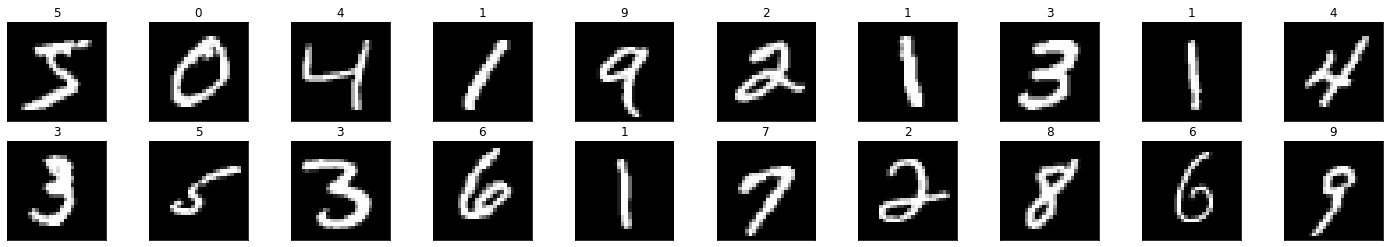

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))


### View an Image in More Detail

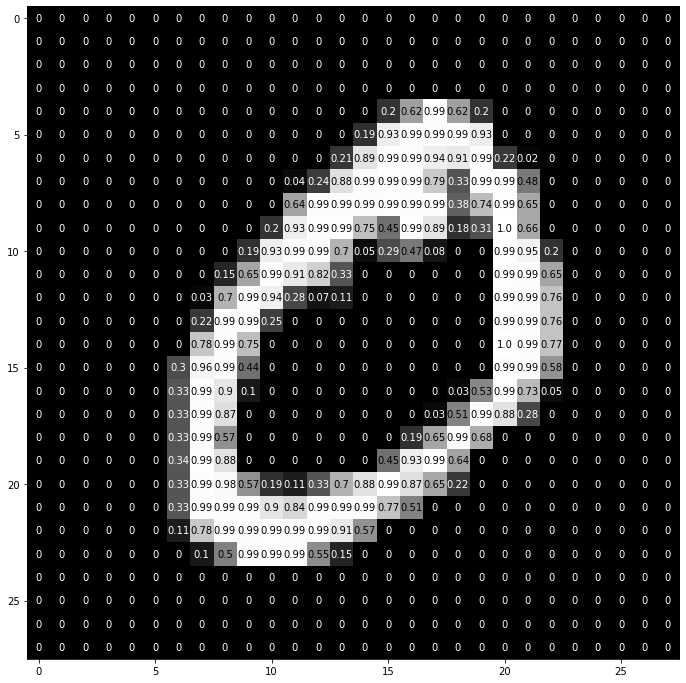

In [4]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')


## Define the Network Architecture

In [5]:
activation_selected = input("Select activation function in this list 'ReLU, Sigmoid, Tanh' ")
print("activation function: " + activation_selected)

# loss_selected = input("Select loss function in this list 'CrossEntropyLoss, NLLLoss, MSELoss' ")
loss_selected = input("Select loss function in this list 'CrossEntropyLoss, NLLLoss' ")
print("loss function: " + loss_selected)

optimiz_selected = input("Select optimizer in this list 'SGD, Adam, Adagrad' ")
print("optimizer: " + optimiz_selected)

Select activation function in this list 'ReLU, Sigmoid, Tanh' ReLU
activation function: ReLU
Select loss function in this list 'CrossEntropyLoss, NLLLoss' CrossEntropyLoss
loss function: CrossEntropyLoss
Select optimizer in this list 'SGD, Adam, Adagrad' SGD
optimizer: SGD


In [6]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture

def select_active_function(activation):
  if activation == 'ReLU':
    return nn.ReLU()
  elif  activation == 'Sigmoid':
    return nn.Sigmoid()
  elif  activation == 'Tanh':
    return nn.Tanh()


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256) # fully connected layer 1
        self.fc2 = nn.Linear(256, 128) # fully connected layer 2
        self.fc3 = nn.Linear(128, 10) # fully connected layer 3     
        self.active_fun = select_active_function(activation_selected) # activation function

    def forward(self, x):
        out = self.fc1(x)
        out = self.active_fun(out)
        out = self.fc2(out)
        out = self.active_fun(out)
        out = self.fc3(out)
        return out        

In [7]:
# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (active_fun): ReLU()
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)


In [8]:
## TODO: specify loss function
# criterion 
def select_loss_function(loss_fun):
  if loss_fun == 'CrossEntropyLoss':
    return nn.CrossEntropyLoss()
  elif  loss_fun == 'NLLLoss':
    return nn.NLLLoss()
  # elif  loss_fun == 'MSELoss':
  #   return nn.MSELoss()

## TODO: specify optimizer
#optimizer = 
#################################################################
def select_optimiz(optimiz):
  if optimiz == 'SGD':
    return optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  elif  optimiz == 'Adam':
    return optim.Adam(model.parameters(), lr=0.01)
  elif  optimiz == 'Adagrad':
    return optim.Adagrad(model.parameters(), lr=0.01)
#################################################################


## Train the Network


In [9]:
## TODO:
###############################################
#               train the model               #

# set the device to be used for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)

criterion = select_loss_function(loss_selected)
optimizer = select_optimiz(optimiz_selected)

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # flatten the images into a vector
        images = images.view(-1, 784)
        
        # forward pass through the network
        outputs = model(images)
        
        # calculate the loss
        loss = criterion(outputs, labels)
        
        # backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # update the running loss
        running_loss += loss.item()
        
        # print some statistics every few batches
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

###############################################
    

Epoch [1/10], Step [100/938], Loss: 1.9386
Epoch [1/10], Step [200/938], Loss: 0.6852
Epoch [1/10], Step [300/938], Loss: 0.4712
Epoch [1/10], Step [400/938], Loss: 0.3600
Epoch [1/10], Step [500/938], Loss: 0.3686
Epoch [1/10], Step [600/938], Loss: 0.3209
Epoch [1/10], Step [700/938], Loss: 0.3188
Epoch [1/10], Step [800/938], Loss: 0.3123
Epoch [1/10], Step [900/938], Loss: 0.2582
Epoch [2/10], Step [100/938], Loss: 0.2195
Epoch [2/10], Step [200/938], Loss: 0.2442
Epoch [2/10], Step [300/938], Loss: 0.2146
Epoch [2/10], Step [400/938], Loss: 0.1945
Epoch [2/10], Step [500/938], Loss: 0.2028
Epoch [2/10], Step [600/938], Loss: 0.1851
Epoch [2/10], Step [700/938], Loss: 0.1866
Epoch [2/10], Step [800/938], Loss: 0.1956
Epoch [2/10], Step [900/938], Loss: 0.1520
Epoch [3/10], Step [100/938], Loss: 0.1313
Epoch [3/10], Step [200/938], Loss: 0.1582
Epoch [3/10], Step [300/938], Loss: 0.1352
Epoch [3/10], Step [400/938], Loss: 0.1301
Epoch [3/10], Step [500/938], Loss: 0.1378
Epoch [3/10

## Predict with Trained Network



In [10]:
## TODO:
###############################################
#               test the model                #

test_loss = 0

with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        # Flatten the images
        images = images.view(-1, 784)
        
        # Forward pass  
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Calculate the loss
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        # Calculate the accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Test Accuracy of the model : {} %'.format(100 * correct / total))

###############################################


Test Accuracy of the model : 97.72 %


In [11]:
y_pred = np.array(predicted.cpu())
y_test = np.array(labels.cpu())
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]
 [0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]


In [12]:
## TODO: calculate and print avg test loss
test_loss = test_loss / len(test_loader)
print('Test Loss: {:.6f}\n'.format(test_loss))

Test Loss: 0.074819



### Visualize Sample Test Results

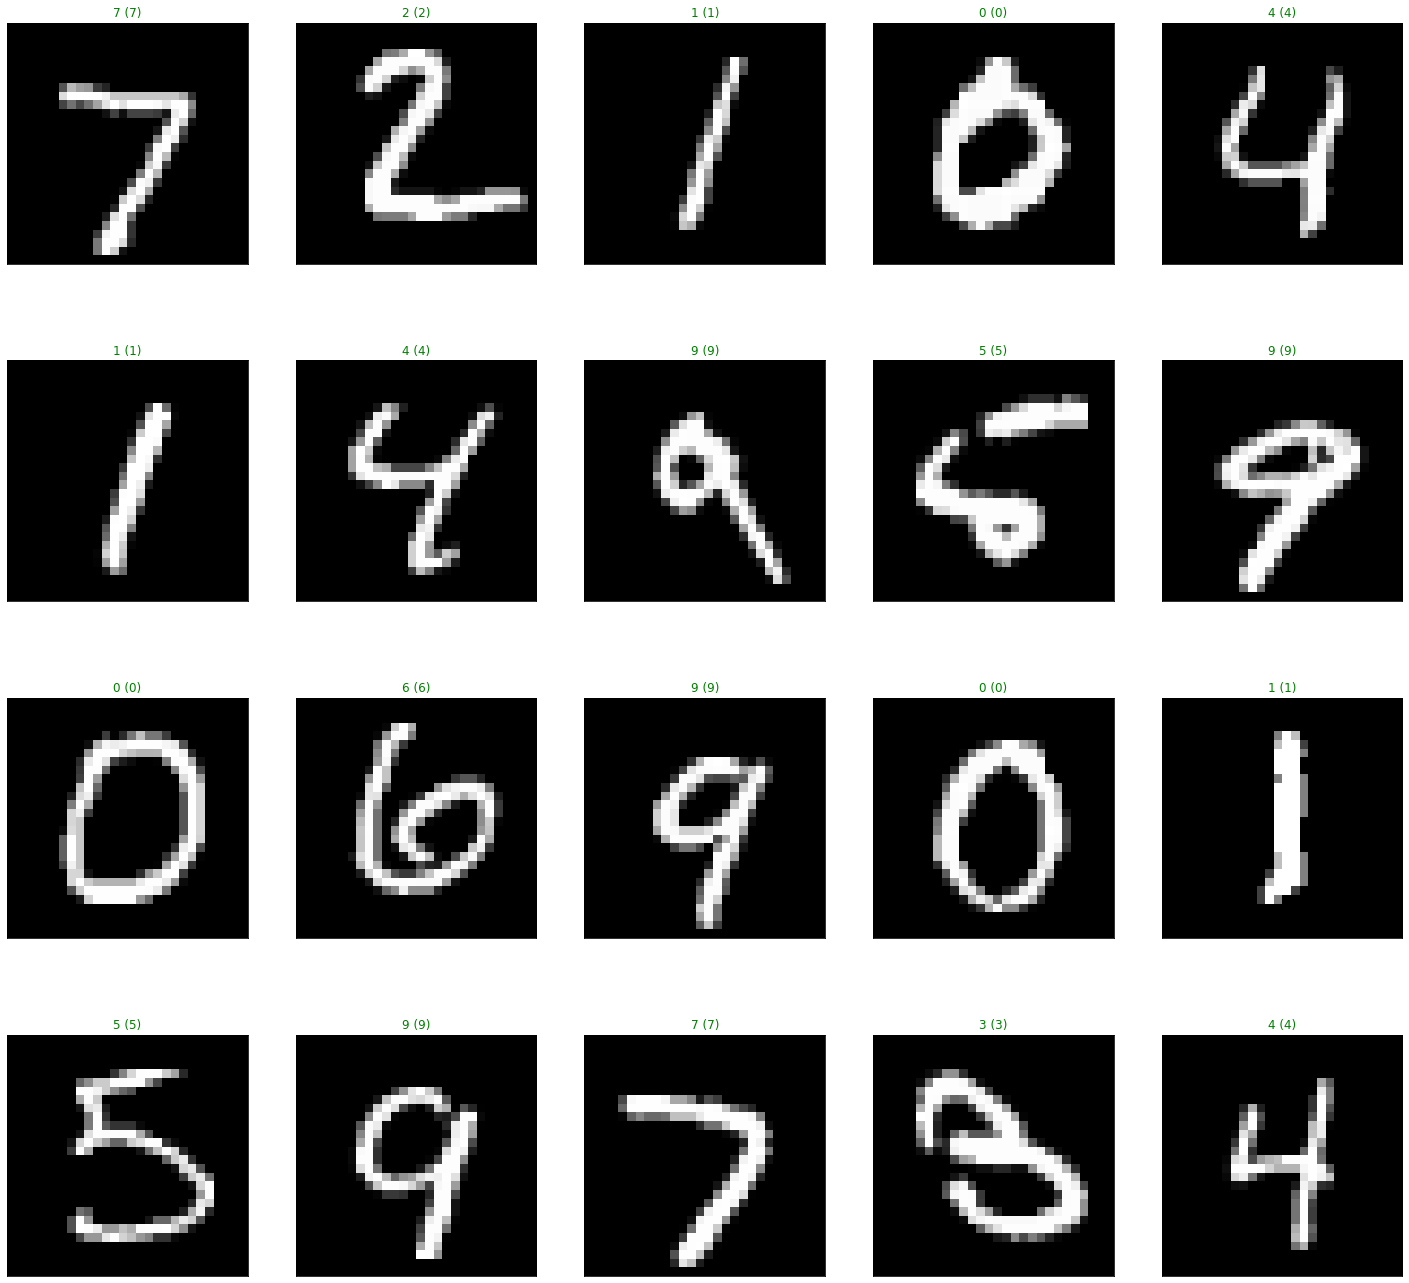

In [13]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
images = images.view(-1, 784)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 30))
for idx in np.arange(20):
    ax = fig.add_subplot(5, 20//4, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].reshape(28, 28)), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## evaluation metrics

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc

#### Calculate Accuracy

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


#### Making the Confusion Matrix

In [16]:
confusion = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(confusion)

confusion matrix:
[[1 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


#### Calculate the f1_score for each class

In [17]:
f1_score_list = f1_score(y_test, y_pred, average=None)

for i, f1_score in enumerate(f1_score_list):
    print('f1_score for class {} is: {}'.format(i, f1_score))

f1_score for class 0 is: 1.0
f1_score for class 1 is: 1.0
f1_score for class 2 is: 1.0
f1_score for class 3 is: 1.0
f1_score for class 4 is: 1.0
f1_score for class 5 is: 1.0
f1_score for class 6 is: 1.0
f1_score for class 7 is: 1.0
f1_score for class 8 is: 1.0
f1_score for class 9 is: 1.0


### Calculate the AUC and ROC

In [18]:
import pandas as pd

y_score = []
for x in y_pred:
    temp = [0]*10
    temp[x] = 1
    y_score.append(temp)
y_score_df = pd.DataFrame(y_score)
y_score_df= y_score_df.fillna(0)
y_score = y_score_df.to_numpy()
print(y_score)

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


##### Calculate the AUC and ROC for each class

In [19]:
from sklearn.preprocessing import label_binarize

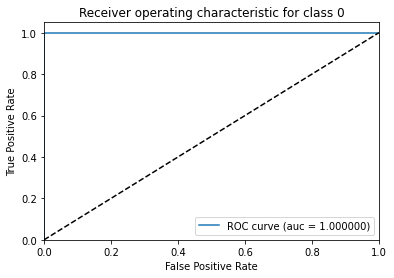

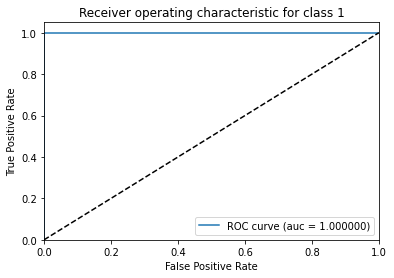

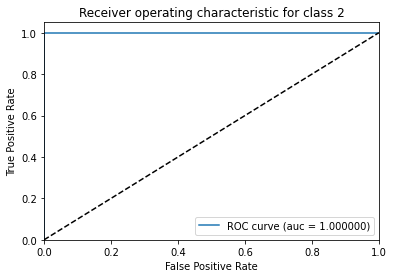

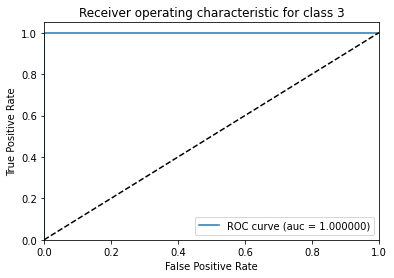

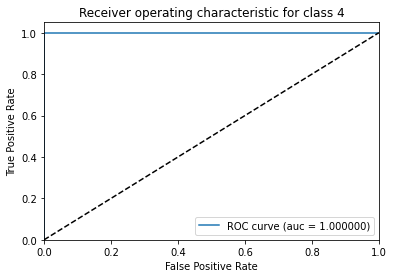

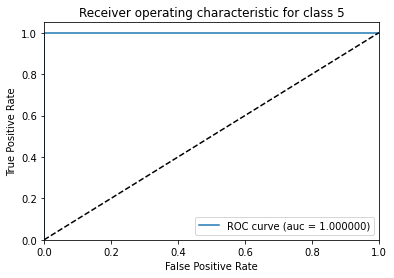

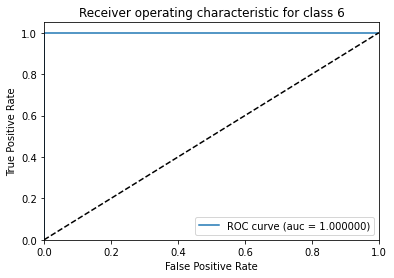

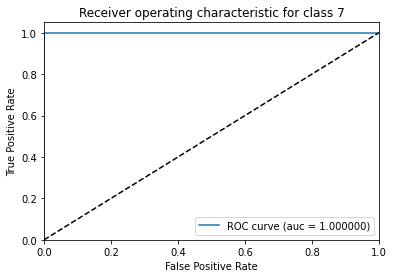

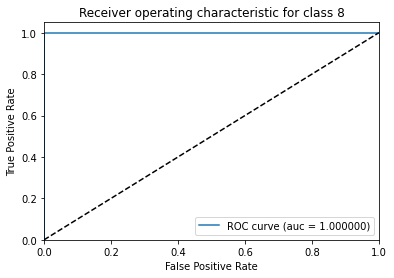

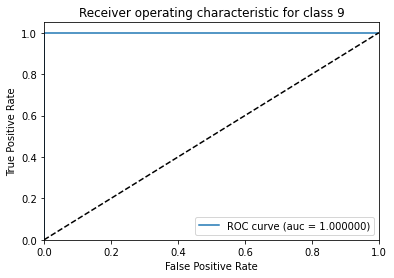

In [20]:
n_classes = 10
y_test_binery = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binery[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (auc = %0.6f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()

##### Calculate the AUC and ROC average

In [21]:
from scipy import interp

<ipython-input-22-53c081b2f536>:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


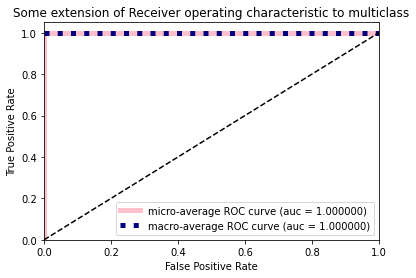

In [22]:
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binery.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (auc = {0:0.6f})".format(roc_auc["micro"]),
    color="pink",
    linewidth=5,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (auc = {0:0.6f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=5,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()
